In [1]:
#necessary imports
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from deepforest import main
import os
import model_utils as mu

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [35]:
#setting the base dataset.
df = pd.read_csv('csv_files/final_dataset_filtered.csv') 

In [36]:
df

img_path         xmin  \
0       Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3332.557861   
1       Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3162.579834   
2       Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  2893.605713   
3       Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  2595.111084   
4     Carlos Vera Guevara RGB_10_7600_7600_11600_116...   249.691879   
...                                                 ...          ...   
4618     Nestor Macias RGB_10_7600_7600_11600_11600.png    32.623880   
4619     Nestor Macias RGB_10_7600_7600_11600_11600.png   905.988037   
4620     Nestor Macias RGB_10_7600_7600_11600_11600.png   962.970642   
4621     Nestor Macias RGB_10_7600_7600_11600_11600.png   295.310394   
4622     Nestor Macias RGB_10_7600_7600_11600_11600.png  1434.487061   

             ymin         xmax         ymax     score  \
0       19.092411  3661.390137   364.616425  0.531211   
1     2148.233398  3431.632324  2379.467041  0.511510   
2      244.011108  3095.620605   451.257812  0.251310   
3     1703.712402  2765.227295  1865.253418  0.217742   
4      123.626862   439.557648   302.768402  0.282849   
...           ...          ...          ...       ...   
4618   654.892212   242.778061   850.323608  0.397208   
4619  3196.281738  1131.675781  3427.410400  0.355852   
4620  1536.193237  1213.003906  1787.660645  0.331348   
4621   371.127441   523.021179   614.510498  0.323385   
4622    10.234108  1635.169678   177.531433  0.312341   

                     img_name  tile_index  tile_xmin  tile_ymin  ...  \
0     Carlos Vera Guevara RGB           3          0       8305  ...   
1     Carlos Vera Guevara RGB           3          0       8305  ...   
2     Carlos Vera Guevara RGB           3          0       8305  ...   
3     Carlos Vera Guevara RGB           3          0       8305  ...   
4     Carlos Vera Guevara RGB          10       7600       7600  ...   
...                       ...         ...        ...        ...  ...   
4618        Nestor Macias RGB          10       7600       7600  ...   
4619        Nestor Macias RGB          10       7600       7600  ...   
4620        Nestor Macias RGB          10       7600       7600  ...   
4621        Nestor Macias RGB          10       7600       7600  ...   
4622        Nestor Macias RGB          10       7600       7600  ...   

                         site          X_g          Y_g  updated diameter  \
0     Carlos Vera Guevara RGB  5298.555843  7709.844671         10.281385   
1     Carlos Vera Guevara RGB  5315.345160  8606.745732         13.528139   
2     Carlos Vera Guevara RGB  5228.142461  7935.770200         12.732366   
3     Carlos Vera Guevara RGB  4434.058601  8354.081799          9.867583   
4     Carlos Vera Guevara RGB  8257.952942  7554.538338         17.825312   
...                       ...          ...          ...               ...   
4618        Nestor Macias RGB  8928.995350  7706.132294          7.778540   
4619        Nestor Macias RGB  9365.333689  8995.309621          6.843647   
4620        Nestor Macias RGB  9180.659810  8052.282053          6.843647   
4621        Nestor Macias RGB  9107.213580  7434.890131          6.843647   
4622        Nestor Macias RGB  9872.366670  7206.437507          6.843647   

       group  updated height        AGB    carbon   id  unique_id  
0     banana             0.0   4.293300  1.674387   30          1  
1     banana             0.0   7.702971  3.004159  112          2  
2     banana             0.0   6.769828  2.640233  179          3  
3     banana             0.0   3.933601  1.534104   93          4  
4     banana             0.0  13.862143  5.406236  162          5  
...      ...             ...        ...       ...  ...        ...  
4618   cacao             2.1   7.015283  2.735960  175       4619  
4619   cacao             0.0   5.444228  2.123249  497       4620  
4620   cacao             0.0   5.444228  2.123249  201       4621  
4621   cacao             0.

Getting this df into the shape deepforest expects. 

In [37]:
deepforest_data = df[['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'unique_id']]
deepforest_data['label'] = 'Tree'

/var/folders/ym/hz9zm7z56_z32pf0g7q1mxdw0000gp/T/ipykernel_24189/1750516733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deepforest_data['label'] = 'Tree'


In [38]:
#rename img_path to image_path
deepforest_data = deepforest_data.rename(columns={'img_path': 'image_path'})

#### Aligning test set with other test data 

In [3]:
#I also need to split the train/test/val like I did in my other model 
#the most important is that the test data aligns and I have that saved 

test_data = pd.read_csv('csv_files/test_data_SEDD.csv')
test_data_deepforest = test_data[['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'unique_id']]
test_data_deepforest['label'] = 'Tree'
test_data_deepforest = test_data_deepforest.rename(columns={'img_path': 'image_path'})


/var/folders/ym/hz9zm7z56_z32pf0g7q1mxdw0000gp/T/ipykernel_21432/4125043323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_deepforest['label'] = 'Tree'


In [40]:
#now I need to remove that test data from the original dataset
deepforest_data = deepforest_data[~deepforest_data['unique_id'].isin(test_data_deepforest['unique_id'])]

In [41]:
deepforest_data

image_path         xmin  \
0     Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3332.557861   
1     Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3162.579834   
2     Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  2893.605713   
3     Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  2595.111084   
5     Carlos Vera Guevara RGB_8_7600_0_11600_4000.png   129.349701   
...                                               ...          ...   
4618   Nestor Macias RGB_10_7600_7600_11600_11600.png    32.623880   
4619   Nestor Macias RGB_10_7600_7600_11600_11600.png   905.988037   
4620   Nestor Macias RGB_10_7600_7600_11600_11600.png   962.970642   
4621   Nestor Macias RGB_10_7600_7600_11600_11600.png   295.310394   
4622   Nestor Macias RGB_10_7600_7600_11600_11600.png  1434.487061   

             ymin         xmax         ymax  unique_id label  
0       19.092411  3661.390137   364.616425          1  Tree  
1     2148.233398  3431.632324  2379.467041          2  Tree  
2      244.011108  3095.620605   451.257812          3  Tree  
3     1703.712402  2765.227295  1865.253418          4  Tree  
5     2401.047852   297.645569  2573.562988          6  Tree  
...           ...          ...          ...        ...   ...  
4618   654.892212   242.778061   850.323608       4619  Tree  
4619  3196.281738  1131.675781  3427.410400       4620  Tree  
4620  1536.193237  1213.003906  1787.660645       4621  Tree  
4621   371.127441   523.021179   614.510498       4622  Tree  
4622    10.234108  1635.169678   177.531433       4623  Tree  

[3963 rows x 7 columns]

In [44]:
test_data_deepforest

image_path         xmin  \
0    Carlos Vera Guevara RGB_10_7600_7600_11600_116...   249.691879   
1         Flora Pluas RGB_16_11400_3800_15400_7800.png   221.227554   
2         Flora Pluas RGB_16_11400_3800_15400_7800.png   851.375183   
3         Flora Pluas RGB_16_11400_3800_15400_7800.png   580.956970   
4         Flora Pluas RGB_16_11400_3800_15400_7800.png   268.345154   
..                                                 ...          ...   
655          Nestor Macias RGB_8_7600_0_11600_4000.png  2108.384277   
656          Nestor Macias RGB_8_7600_0_11600_4000.png  1102.182739   
657          Nestor Macias RGB_8_7600_0_11600_4000.png  2195.625000   
658          Nestor Macias RGB_8_7600_0_11600_4000.png  1771.353394   
659          Nestor Macias RGB_8_7600_0_11600_4000.png   454.205810   

            ymin         xmax         ymax  unique_id label  
0     123.626862   439.557648   302.768402          5  Tree  
1    1518.906982   554.675903  1853.205200        479  Tree  
2    3413.090820  1199.489258  3750.208740        480  Tree  
3    1283.716919   960.879639  1685.161377        481  Tree  
4    3265.031982   626.756531  3652.452637        482  Tree  
..           ...          ...          ...        ...   ...  
655  1593.915527  2337.520264  1810.984497       4598  Tree  
656  1829.543701  1334.234375  2061.860596       4599  Tree  
657   437.670471  2564.146484   785.308716       4600  Tree  
658  1340.999268  2014.887329  1571.038574       4601  Tree  
659   548.869568   650.302795   749.565247       4602  Tree  

[660 rows x 7 columns]

Good. This confirms I have removed the correct number of rows from the overall dataframe. Now I can split my training and val data the same way I did in the SEDD model. 

In [45]:
remaining_size = len(deepforest_data['image_path'].unique())
print(remaining_size)
train_size = int(0.7 * remaining_size)
print(train_size)
val_size = int(0.3 * remaining_size)
print(val_size)

76
53
22


In [46]:
tiles = deepforest_data['image_path'].unique()
np.random.seed(42)
np.random.shuffle(tiles)

# Calculate split indices
train_end = train_size
val_end = train_end + val_size

train_tiles = tiles[:train_end]
val_tiles = tiles[train_end:val_end]

# Filter DataFrames
train_df = deepforest_data[deepforest_data['image_path'].isin(train_tiles)]
val_df = deepforest_data[deepforest_data['image_path'].isin(val_tiles)]

# Output sizes
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(val_df)}')

Training set size: 2727
Validation set size: 1170


In [55]:
#save all of these as CSVs 
train_df.to_csv('csv_files/train_deepforest.csv', index=False)
val_df.to_csv('csv_files/val_deepforest.csv', index=False)
test_data_deepforest.to_csv('csv_files/test_deepforest.csv', index=False)

NB: This is not exactly the same as the training/val split we saw in the SEDD model because of the randomness, but since there is no data leakage with the test set it should be okay. 

### Setting the Deep Forest model

In [48]:
m = main.deepforest()
m.config['gpus'] = '-1' #move to GPU and use all the GPU resources
m.config["train"]["csv_file"] = 'csv_files/train_deepforest.csv'
m.config["train"]["root_dir"] = 'data/tiles/processed'
m.config["score_thresh"] = 0.4
m.config["train"]['epochs'] = 10
m.config["validation"]["csv_file"] = 'csv_files/val_deepforest.csv'
m.config["validation"]["root_dir"] = 'data/tiles/processed'
#create a pytorch lighting trainer used to training
m.create_trainer()
#load the lastest release model
m.use_release()

Reading config file: /opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml
No validation file provided. Turning off validation loop


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..


Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [49]:
import time
start_time = time.time()
m.trainer.fit(m)
print(f"--- Training: {(time.time() - start_time):.2f} seconds ---")

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

  | Name       | Type                  | Params | Mode 
-------------------------------------------------------------
0 | model      | RetinaNet             | 32.1 M | train
1 | iou_metric | IntersectionOverUnion | 0      | train
2 | mAP_metric | MeanAveragePrecision  | 0      | train
-------------------------------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/albumentations/core/composition.py:144: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:02<00:02,  0.38it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/IoU.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iou_df = pd.concat(iou_df)
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/evaluate.py:193: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(results)
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider s

Epoch 0:   0%|          | 0/53 [00:00<?, ?it/s] 

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 0: 100%|██████████| 53/53 [01:18<00:00,  0.67it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/IoU.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iou_df = pd.concat(iou_df)
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/IoU.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iou_df = pd.concat(iou_df)
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/IoU.py:113: FutureWarning: The behavior of DataFrame concatenation

Epoch 1:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/IoU.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iou_df = pd.concat(iou_df)
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 1: 100%|██████████| 53/53 [01:07<00:00,  0.79it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 2:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 2: 100%|██████████| 53/53 [01:03<00:00,  0.83it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 3:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 3: 100%|██████████| 53/53 [01:01<00:00,  0.86it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 4:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 4: 100%|██████████| 53/53 [00:57<00:00,  0.92it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 5:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 5: 100%|██████████| 53/53 [00:57<00:00,  0.92it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 6:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 6: 100%|██████████| 53/53 [00:58<00:00,  0.90it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 7:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 7: 100%|██████████| 53/53 [01:13<00:00,  0.72it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 8:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 8: 100%|██████████| 53/53 [01:03<00:00,  0.83it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 9:   0%|          | 0/53 [00:00<?, ?it/s, v_num=6]         

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Epoch 9: 100%|██████████| 53/53 [00:59<00:00,  0.90it/s, v_num=6]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 9: 100%|██████████| 53/53 [02:21<00:00,  0.38it/s, v_num=6]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 53/53 [02:21<00:00,  0.38it/s, v_num=6]
--- Training: 1435.68 seconds ---


In [50]:
#save the model 
m.save_model("models/deepforest_model.pth")

In [4]:
#load the model 
m = main.deepforest.load_from_checkpoint("models/deepforest_model.pth")

Reading config file: /opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


In [5]:
test_file = 'csv_files/test_deepforest.csv'
results = m.evaluate(
    test_file,
    root_dir='data/tiles/processed',
    iou_threshold=0.1
)

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/albumentations/core/composition.py:144: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
Missing logger folder: /Users/ger23/Desktop/irp-ger23/ReforesTree/lightning_logs
/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


Predicting DataLoader 0: 100%|██████████| 16/16 [00:49<00:00,  0.32it/s]


In [6]:
results['box_precision']

0.45075589372306823

In [7]:
results["box_recall"]

0.7348559510777048

In [8]:
unique_img_paths = test_data['img_path'].unique()

In [9]:
root_dir = 'data/tiles/processed/'

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/main.py:338: UserWarning: Image type is uint8, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn(f"Image type is {image.dtype}, transforming to float32. "


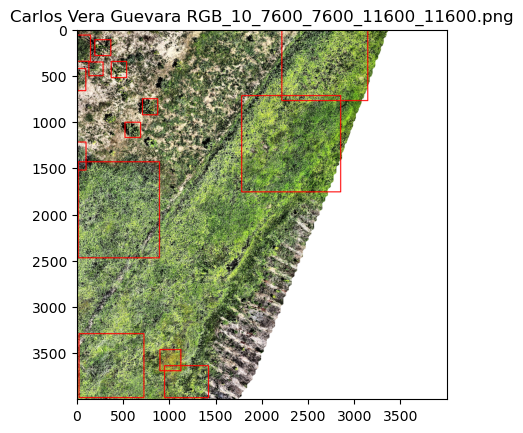

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/main.py:338: UserWarning: Image type is uint8, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn(f"Image type is {image.dtype}, transforming to float32. "


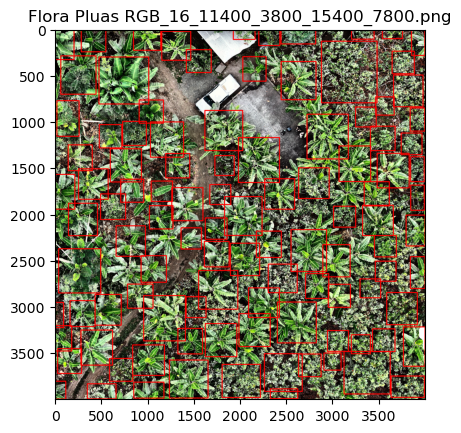

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/deepforest/main.py:338: UserWarning: Image type is uint8, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn(f"Image type is {image.dtype}, transforming to float32. "


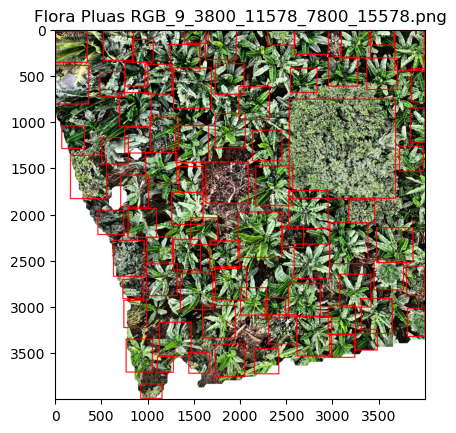

In [10]:
#visualize only 3 for file size purposes

count = 0
for image_name in unique_img_paths:
    count += 1
    if count > 3:
        break
    path = os.path.join(root_dir, image_name)
    image = Image.open(path)
    image = np.array(image)
    updated = m.predict_image(image, return_plot = True, color=(0, 0, 255), thickness=10)
    plt.imshow(updated[:,:,::-1])
    plt.title(image_name)
    plt.show()

In [11]:
#saving all the coordinates of these bounding boxes 
list_of_predictions = []
for image_name in unique_img_paths:
    path = os.path.join(root_dir, image_name)
    prediction = m.predict_image(path = path, return_plot = False)
    list_of_predictions.append(prediction)

In [12]:
list_of_predictions[11]

xmin    ymin    xmax    ymax label     score  \
0    985.0  2976.0  1279.0  3290.0  Tree  0.634843   
1      4.0  2640.0   353.0  3043.0  Tree  0.605874   
2    787.0   712.0  1115.0  1049.0  Tree  0.518443   
3   1084.0  2623.0  1408.0  2980.0  Tree  0.506233   
4   3066.0  1565.0  3263.0  1770.0  Tree  0.504294   
5   1437.0  2430.0  1747.0  2742.0  Tree  0.499495   
6   1892.0  2005.0  2113.0  2216.0  Tree  0.471515   
7    883.0  1767.0  1120.0  2004.0  Tree  0.461268   
8    683.0  2944.0   958.0  3224.0  Tree  0.455360   
9    864.0  1420.0  1150.0  1725.0  Tree  0.453159   
10   962.0  2401.0  1206.0  2659.0  Tree  0.444970   
11   410.0  3021.0   699.0  3334.0  Tree  0.438200   
12  1619.0  2179.0  1829.0  2419.0  Tree  0.430182   
13   193.0  3463.0   400.0  3695.0  Tree  0.426933   
14  1250.0  1175.0  1530.0  1437.0  Tree  0.425745   
15  1888.0  2642.0  2096.0  2857.0  Tree  0.422825   
16   176.0   642.0   400.0   885.0  Tree  0.419008   
17     1.0   760.0   156.0  1002.0  Tree  0.418953   
18  1318.0  1439.0  1590.0  1699.0  Tree  0.416213   
19   124.0  3086.0   395.0  3362.0  Tree  0.412001   
20    12.0  3758.0   243.0  3988.0  Tree  0.406115   
21  1577.0  1562.0  1881.0  1901.0  Tree  0.399011   
22  2372.0  2284.0  2536.0  2452.0  Tree  0.396491   
23   410.0   686.0   671.0   958.0  Tree  0.394838   
24   408.0  2566.0   716.0  2896.0  Tree  0.382766   
25  3722.0   751.0  4000.0  1182.0  Tree  0.378151   
26  1168.0     4.0  1335.0   170.0  Tree  0.375269   
27   521.0   985.0   793.0  1267.0  Tree  0.374259   
28    95.0   981.0   439.0  1315.0  Tree  0.366007   
29  1193.0  1672.0  1471.0  1972.0  Tree  0.364620   
30   423.0  3323.0   721.0  3582.0  Tree  0.359971   
31   735.0  2575.0  1011.0  2873.0  Tree  0.358606   
32   925.0   194.0  1148.0   412.0  Tree  0.358555   
33   564.0    18.0   869.0   323.0  Tree  0.357981   
34   323.0   336.0   582.0   602.0  Tree  0.357433   
35    10.0   377.0   220.0   614.0  Tree  0.357069   
36  1099.0   419.0  1311.0   627.0  Tree  0.348850   
37   757.0  2117.0  1054.0  2432.0  Tree  0.346225   
38   533.0  2127.0   742.0  2331.0  Tree  0.345946   
39   793.0  1099.0  1090.0  1394.0  Tree  0.336172   
40  2208.0  2483.0  2370.0  2658.0  Tree  0.335859   
41   399.0  2314.0   644.0  2550.0  Tree  0.333715   
42  1659.0  1957.0  1870.0  2170.0  Tree  0.329377   
43  1899.0  2425.0  2110.0  2639.0  Tree  0.320503   
44   554.0   388.0   818.0   662.0  Tree  0.318839   
45     0.0  1329.0   191.0  1567.0  Tree  0.317899   
46   471.0  1877.0   738.0  2144.0  Tree  0.312639   
47    63.0  2043.0   393.0  2390.0  Tree  0.309889   
48   482.0  1443.0   778.0  1754.0  Tree  0.302425   
49  1188.0  2359.0  1409.0  2599.0  Tree  0.301649   
50    71.0   159.0   326.0   390.0  Tree  0.296922   
51   261.0  3714.0   441.0  3902.0  Tree  0.291139   
52  1078.0  2108.0  1314.0  2361.0  Tree  0.290806   
53     0.0  1747.0   186.0  2073.0  Tree  0.286608   
54  3721.0   300.0  3968.0   529.0  Tree  0.260366   
55  2675.0   827.0  2954.0  1139.0  Tree  0.240126   
56  1344.0  2064.0  1633.0  2381.0  Tree  0.227048   
57  3098.0  1092.0  3444.0  1416.0  Tree  0.212297   
58     0.0  3359.0   205.0  3711.0  Tree  0.211009   

                                        image_path  
0   Nestor Macias RGB_11_7600_9024_11600_13024.png  
1   Nestor Macias RGB_11_7600_9024_11600_13024.png  
2   Nestor Macias RGB_11_7600_9024_11600_13024.png  
3   Nestor Macias RGB_11_7600_9024_11600_13024.png  
4   Nestor Macias RGB_11_7600_9024_11600_13024.png  
5   Nestor Macias RGB_11_7600_9024_11600_13024.png  
6   Nestor Macias RGB_11_7600_9024_11600_13024.png  
7   Nestor Macias RGB_11_7600_9024_11600_13024.png  
8   Nestor Macias RGB_11_7600_9024_11600_13024.png  
9   Nestor Macias RGB_11_7600_9024_11600_13024.png  
10  Nestor Macias RGB_11_7600_9024_11600_13024.png  
11  Nestor Macias RGB_11_7600_9024_11600_13024.png  
12  Nestor Macias RGB_11_7600_9024_11600_13024.png  
13  Nestor Macias RGB_1

### Figuring out which box has the highest IoU with original image

In [13]:
test_data_grouped = test_data.groupby('img_path')

In [14]:
#put unique image paths in a dictionary with integers as the keys 
unique_img_paths_dict = {}
for i, img_path in enumerate(unique_img_paths):
    unique_img_paths_dict[i] = img_path

In [15]:
unique_img_paths_dict

{0: 'Carlos Vera Guevara RGB_10_7600_7600_11600_11600.png',
 1: 'Flora Pluas RGB_16_11400_3800_15400_7800.png',
 2: 'Flora Pluas RGB_9_3800_11578_7800_15578.png',
 3: 'Flora Pluas RGB_14_7600_11578_11600_15578.png',
 4: 'Flora Pluas RGB_15_11400_0_15400_4000.png',
 5: 'Leonor Aspiazu RGB_9_7600_3800_11600_7800.png',
 6: 'Leonor Aspiazu RGB_2_0_7600_4000_11600.png',
 7: 'Leonor Aspiazu RGB_14_11400_7600_15400_11600.png',
 8: 'Leonor Aspiazu RGB_6_3800_7600_7800_11600.png',
 9: 'Manuel Macias RGB_8_7600_6879_11600_10879.png',
 10: 'Manuel Macias RGB_5_3800_6879_7800_10879.png',
 11: 'Nestor Macias RGB_11_7600_9024_11600_13024.png',
 12: 'Nestor Macias RGB_8_7600_0_11600_4000.png',
 13: 'Carlos Vera Guevara RGB_11_7600_8305_11600_12305.png',
 14: 'Carlos Vera Arteaga RGB_7_3800_11053_7800_15053.png',
 15: 'Manuel Macias RGB_9_9748_0_13748_4000.png'}

In [16]:
image_path_to_index = {v: k for k, v in unique_img_paths_dict.items()}

In [17]:
iou_results = mu.generate_iou_results(test_data_grouped, image_path_to_index, list_of_predictions)

No best prediction found for True Box: [131.5652466, 1348.927124, 284.4077148, 1503.319336] in Image: Carlos Vera Arteaga RGB_7_3800_11053_7800_15053.png
No best prediction found for True Box: [134.5652466, 1351.927124, 282.4077148, 1501.319336] in Image: Carlos Vera Arteaga RGB_7_3800_11053_7800_15053.png
No best prediction found for True Box: [304.9764099, 893.9026489, 460.3436279, 1053.398071] in Image: Carlos Vera Guevara RGB_10_7600_7600_11600_11600.png
No best prediction found for True Box: [3102.232666, 3030.331787, 3334.757324, 3244.675049] in Image: Flora Pluas RGB_16_11400_3800_15400_7800.png
No best prediction found for True Box: [3769.530273, 1537.740601, 4000.0, 1947.928345] in Image: Flora Pluas RGB_9_3800_11578_7800_15578.png
No best prediction found for True Box: [3880.046143, 1977.674072, 3995.986572, 2223.29248] in Image: Flora Pluas RGB_9_3800_11578_7800_15578.png
No best prediction found for True Box: [1009.323486, 7.314544201, 1465.261108, 438.8476868] in Image: Le

In [18]:
iou_results

true_box_xmin  true_box_ymin  true_box_xmax  true_box_ymax  \
0      1026.343384      14.278225    1645.476196     353.427582   
1      1219.373169    2376.889404    1409.002075    2567.502930   
2       919.469971    1128.330933    1092.855713    1298.221558   
3       780.275696     242.771759     957.486023     421.889069   
4      1220.263062    1941.992798    1395.337036    2116.220215   
..             ...            ...            ...            ...   
632    2108.384277    1593.915527    2337.520264    1810.984497   
633    1102.182739    1829.543701    1334.234375    2061.860596   
634    2195.625000     437.670471    2564.146484     785.308716   
635    1771.353394    1340.999268    2014.887329    1571.038574   
636     454.205810     548.869568     650.302795     749.565247   

     pred_box_xmin  pred_box_ymin  pred_box_xmax  pred_box_ymax  \
0           1089.0            4.0         1649.0          316.0   
1           1229.0         2402.0         1413.0         2574.0   
2            921.0         1120.0         1108.0         1295.0   
3            752.0          203.0          965.0          423.0   
4           1213.0         1945.0         1399.0         2110.0   
..             ...            ...            ...            ...   
632         2318.0         1547.0         2545.0         1775.0   
633         1043.0         1964.0         1356.0         2296.0   
634         2162.0          425.0         2547.0          817.0   
635         1791.0         1341.0         1997.0         1548.0   
636          553.0          619.0          886.0          964.0   

                                            image_path       iou  
0    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.774460  
1    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.783909  
2    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.854032  
3    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.677367  
4    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.894189  
..                                                 ...       ...  
632          Nestor Macias RGB_8_7600_0_11600_4000.png  0.036084  
633          Nestor Macias RGB_8_7600_0_11600_4000.png  0.168067  
634          Nestor Macias RGB_8_7600_0_11600_4000.png  0.778626  
635          Nestor Macias RGB_8_7600_0_11600_4000.png  0.761160  
636          Nestor Macias RGB_8_7600_0_11600_4000.png  0.089760  

[637 rows x 10 columns]

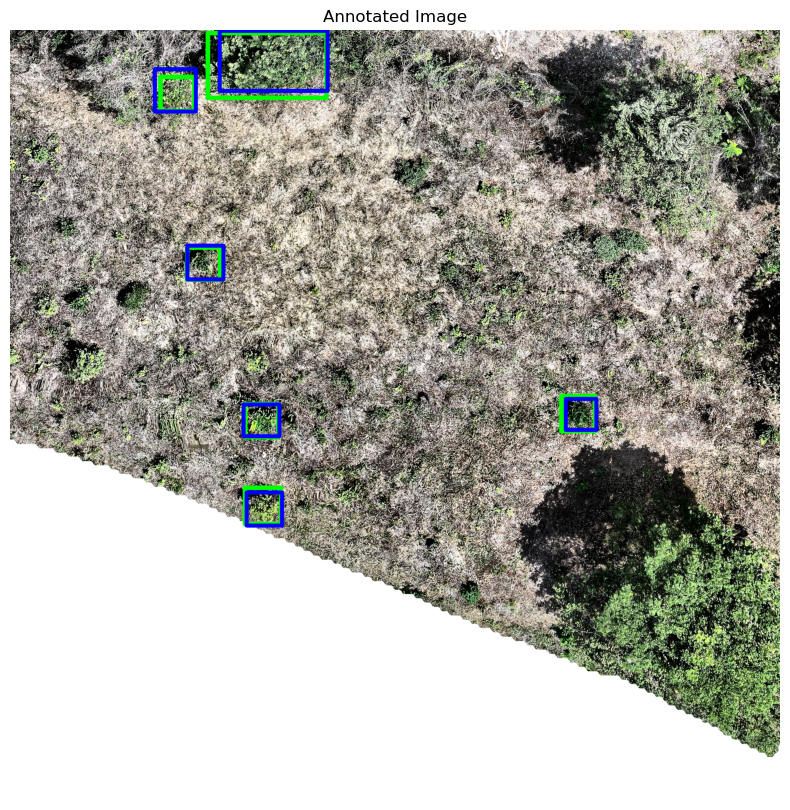

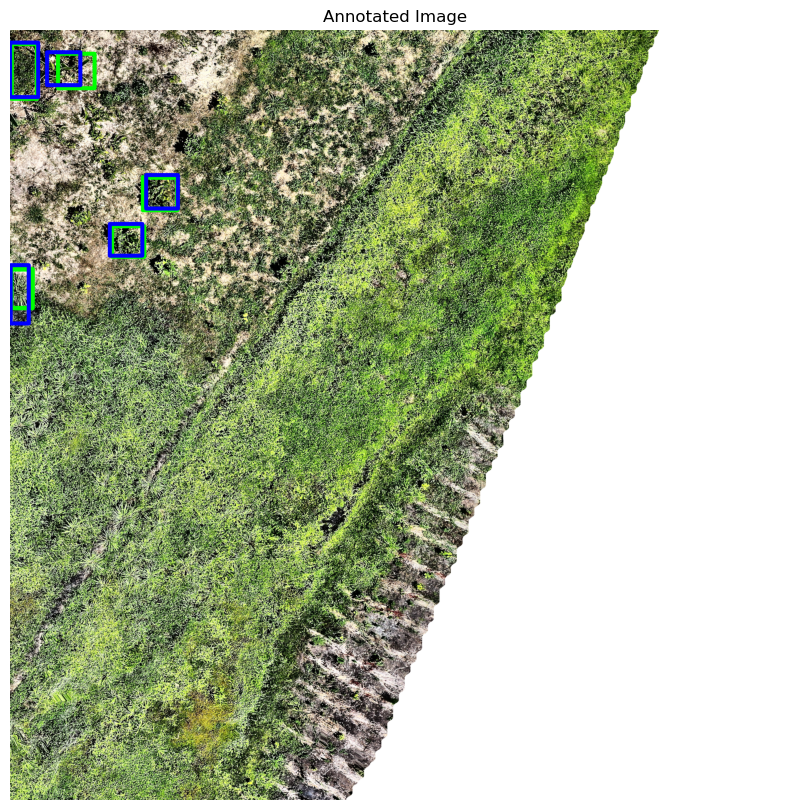

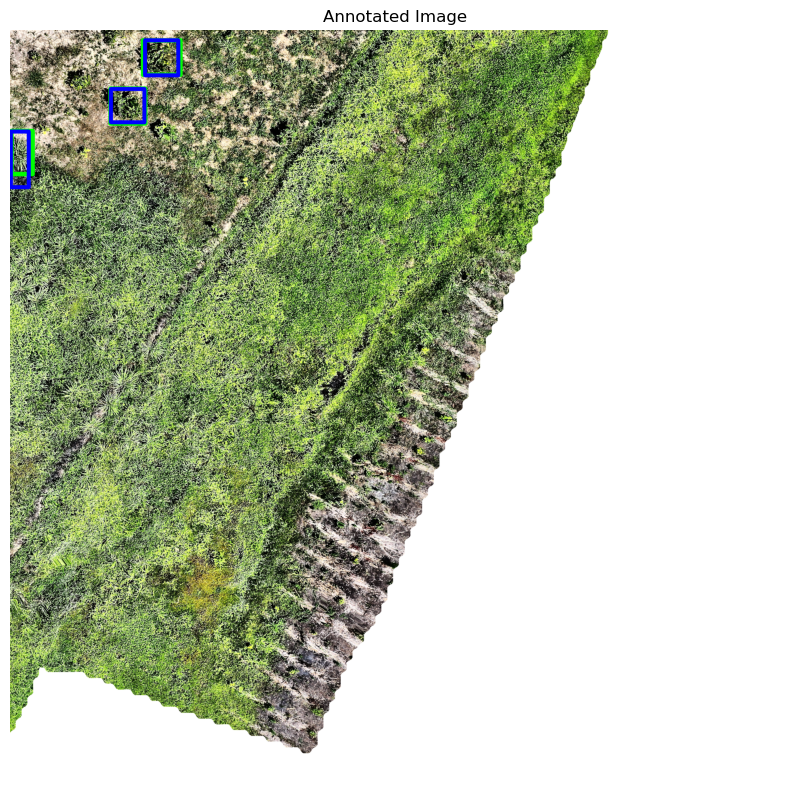

In [19]:
# Group by image path and iterate through each group visualizing the true and predicted boxes

#Only visualize 3 for file size purposes 

count = 0
for image_path, group in iou_results.groupby('image_path'):
    if count == 3:
        break
    # Collect true and predicted boxes for the current image
    true_boxes = group[['true_box_xmin', 'true_box_ymin', 'true_box_xmax', 'true_box_ymax']].values.tolist()
    pred_boxes = group[['pred_box_xmin', 'pred_box_ymin', 'pred_box_xmax', 'pred_box_ymax']].values.tolist()

    # Draw boxes and display/save the image
    mu.draw_comparison_boxes(image_path, root_dir, true_boxes, pred_boxes)
    count += 1


In [20]:
#save results as a CSV
iou_results.to_csv('csv_files/iou_results_deepforest.csv', index=False)

In [21]:
iou_results

true_box_xmin  true_box_ymin  true_box_xmax  true_box_ymax  \
0      1026.343384      14.278225    1645.476196     353.427582   
1      1219.373169    2376.889404    1409.002075    2567.502930   
2       919.469971    1128.330933    1092.855713    1298.221558   
3       780.275696     242.771759     957.486023     421.889069   
4      1220.263062    1941.992798    1395.337036    2116.220215   
..             ...            ...            ...            ...   
632    2108.384277    1593.915527    2337.520264    1810.984497   
633    1102.182739    1829.543701    1334.234375    2061.860596   
634    2195.625000     437.670471    2564.146484     785.308716   
635    1771.353394    1340.999268    2014.887329    1571.038574   
636     454.205810     548.869568     650.302795     749.565247   

     pred_box_xmin  pred_box_ymin  pred_box_xmax  pred_box_ymax  \
0           1089.0            4.0         1649.0          316.0   
1           1229.0         2402.0         1413.0         2574.0   
2            921.0         1120.0         1108.0         1295.0   
3            752.0          203.0          965.0          423.0   
4           1213.0         1945.0         1399.0         2110.0   
..             ...            ...            ...            ...   
632         2318.0         1547.0         2545.0         1775.0   
633         1043.0         1964.0         1356.0         2296.0   
634         2162.0          425.0         2547.0          817.0   
635         1791.0         1341.0         1997.0         1548.0   
636          553.0          619.0          886.0          964.0   

                                            image_path       iou  
0    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.774460  
1    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.783909  
2    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.854032  
3    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.677367  
4    Carlos Vera Arteaga RGB_7_3800_11053_7800_1505...  0.894189  
..                                                 ...       ...  
632          Nestor Macias RGB_8_7600_0_11600_4000.png  0.036084  
633          Nestor Macias RGB_8_7600_0_11600_4000.png  0.168067  
634          Nestor Macias RGB_8_7600_0_11600_4000.png  0.778626  
635          Nestor Macias RGB_8_7600_0_11600_4000.png  0.761160  
636          Nestor Macias RGB_8_7600_0_11600_4000.png  0.089760  

[637 rows x 10 columns]